In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy import stats
from config import config_dict
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

pd.options.display.max_columns=100

In [2]:
# Make directory for saving figures
if not os.path.exists('figs/s2'):
    os.makedirs('figs/s2')

# Load data

In [3]:
df_shanks = pd.read_csv(config_dict['processed_path'] + 'df_shanks_stats.csv', index_col=0)
df_neus_raw = pd.read_csv(config_dict['processed_path'] + 'df_neus_stats.csv', index_col=0)
df_shapefr_corrs = pd.read_csv(config_dict['processed_path'] + 'df_fr_shape_corrs.csv', index_col=0)
df_shapespkt_corrs = pd.read_csv(config_dict['processed_path'] + 'df_spktime_shape_corrs.csv', index_col=0)
df_neus = df_neus_raw.merge(df_shapefr_corrs, on=['rat', 'sess', 'sh', 'clu'], how='outer')
df_neus = df_neus.merge(df_shapespkt_corrs, on=['rat', 'sess', 'sh', 'clu'], how='outer')
df_neus = df_neus[df_neus['N_spikes_burst0'] >= config_dict['analysis_N_spikes_min']]
df_neus.dropna(inplace=True)

In [4]:
df_shanks.head()

,rat,sess,sh,Fs,elec,burst_type,amp_mean,period_mean,rdsym_mean,ptsym_mean,cycling_frac,N_cycles_all,N_cycles_burst,N_seconds,corr_volt_amp_period_r,corr_volt_amp_period_p,corr_volt_amp_time_rdsym_r,corr_volt_amp_time_rdsym_p,corr_volt_amp_time_ptsym_r,corr_volt_amp_time_ptsym_p,corr_period_time_rdsym_r,corr_period_time_rdsym_p,corr_period_time_ptsym_r,corr_period_time_ptsym_p,corr_time_rdsym_time_ptsym_r,corr_time_rdsym_time_ptsym_p,mv_amp_mean,ms_period_mean
0,ec013,ec013.426,4,1250,0,0,2319.532520,161.287866,0.412290,0.414131,0.785563,11644,9362,1537.7272,-0.077456,6.156500e-14,0.040812,7.814688e-05,-0.056677,4.075107e-08,-0.078357,3.143550e-14,0.068883,2.523349e-11,-0.069632,1.533282e-11,2.319533,129.030293
1,ec013,ec013.426,4,1250,0,1,2506.020471,159.755894,0.413762,0.416971,0.229142,11644,2757,1537.7272,-0.045395,1.714016e-02,0.074978,8.125541e-05,-0.005567,7.701624e-01,-0.139330,2.006159e-13,0.089944,2.243371e-06,-0.078136,4.006003e-05,2.506020,127.804715
2,ec013,ec013.426,4,1250,0,2,2294.748565,162.577416,0.417008,0.418010,0.857648,11644,10140,1537.7272,-0.074177,7.498704e-14,0.022376,2.424323e-02,-0.069449,2.542994e-12,-0.053720,6.206877e-08,0.062979,2.190056e-10,-0.062067,3.969768e-10,2.294749,130.061933
3,ec013,ec013.426,4,1250,0,3,2596.327103,156.988942,0.434752,0.428598,0.051699,11644,633,1537.7272,0.047954,2.282801e-01,0.045272,2.553896e-01,0.083773,3.509748e-02,-0.073497,6.460276e-02,-0.005631,8.875558e-01,0.026173,5.109850e-01,2.596327,125.591153
4,ec013,ec013.426,5,1250,0,0,2200.710141,161.099577,0.412755,0.419072,0.773503,11619,9229,1537.7200,-0.068670,4.006313e-11,0.062534,1.825662e-09,-0.043223,3.271105e-05,-0.082509,2.039848e-15,0.070847,9.510113e-12,-0.067264,9.909330e-11,2.200710,128.879662


In [5]:
df_neus.head()

,rat,sess,sh,clu,fr1,fr2,type,fr_recording,N_spikes_recording,fr_burst0,fr_notburst0,N_spikes_burst0,mwu_fr_burst0_notburst_p,fr_burst1,fr_notburst1,N_spikes_burst1,mwu_fr_burst1_notburst_p,fr_burst2,fr_notburst2,N_spikes_burst2,mwu_fr_burst2_notburst_p,fr_burst3,fr_notburst3,N_spikes_burst3,mwu_fr_burst3_notburst_p,sfc_magnitude_recording,sfc_phase_recording,sfc_magnitude_cycles,sfc_phase_cycles,sfc_magnitude_cycles_hilbert,sfc_phase_cycles_hilbert,norm_fr_diff_burst0,norm_fr_diff_burst1,norm_fr_diff_burst2,norm_fr_diff_burst3,sfc_phase_cycles_2pi,burst_type,corr_cycle_fr_volt_amp_r,corr_cycle_fr_volt_amp_p,corr_cycle_fr_period_r,corr_cycle_fr_period_p,corr_cycle_fr_time_rdsym_r,corr_cycle_fr_time_rdsym_p,corr_cycle_fr_time_ptsym_r,corr_cycle_fr_time_ptsym_p,corr_burst_across_fr_volt_amp_r,corr_burst_across_fr_volt_amp_p,corr_burst_within_fr_volt_amp_avgr,corr_burst_within_fr_volt_amp_p,corr_burst_across_fr_period_r,corr_burst_across_fr_period_p,corr_burst_within_fr_period_avgr,corr_burst_within_fr_period_p,corr_burst_across_fr_time_rdsym_r,corr_burst_across_fr_time_rdsym_p,corr_burst_within_fr_time_rdsym_avgr,corr_burst_within_fr_time_rdsym_p,corr_burst_across_fr_time_ptsym_r,corr_burst_across_fr_time_ptsym_p,corr_burst_within_fr_time_ptsym_avgr,corr_burst_within_fr_time_ptsym_p,glm_cycle_fr_coef_volt_amp,glm_cycle_fr_p_volt_amp,glm_cycle_fr_coef_period,glm_cycle_fr_p_period,glm_cycle_fr_coef_time_rdsym,glm_cycle_fr_p_time_rdsym,glm_cycle_fr_coef_time_ptsym,glm_cycle_fr_p_time_ptsym,glm_cycle_fr_r2,glm_burst_fr_coef_volt_amp,glm_burst_fr_p_volt_amp,glm_burst_fr_coef_period,glm_burst_fr_p_period,glm_burst_fr_coef_time_rdsym,glm_burst_fr_p_time_rdsym,glm_burst_fr_coef_time_ptsym,glm_burst_fr_p_time_ptsym,glm_burst_fr_r2,glm_speed_fr_coef_volt_amp,glm_speed_fr_p_volt_amp,glm_speed_fr_coef_period,glm_speed_fr_p_period,glm_speed_fr_coef_time_rdsym,glm_speed_fr_p_time_rdsym,glm_speed_fr_coef_time_ptsym,glm_speed_fr_p_time_ptsym,glm_speed_fr_coef_speed,glm_speed_fr_p_speed,glm_speed_fr_r2,nonuniform_norm_spk_times_D,nonuniform_norm_spk_times_p,mwu_normtime_rdsym_p,norm_spktime_asym_mode,norm_spktime_sym_mode,mwu_trough_time_rdsym_p,trough_spike_asym_mode,trough_spike_sym_mode,pha_spike_asym_mode,pha_spike_sym_mode
353,ec014,ec014.183,0,2,2.926401,3.205607,i,0.403591,1552,0.312845,0.596378,818,7.989087e-15,0.142209,0.488426,134,1.456699e-23,0.344282,0.615111,1034,5.531508e-11,0.060265,0.432503,18,6.727093e-10,0.385240,2.774214,0.336951,2.587782,0.358574,2.484881,-0.311841,-0.548997,-0.282292,-0.755401,2.587782,0.0,0.004023,5.585713e-01,0.071948,1.109274e-25,0.023484,0.000636,0.000892,8.967401e-01,0.036080,0.096128,-0.006075,0.909968,0.061915,0.004274,0.200039,2.693972e-09,0.016313,4.519691e-01,0.139926,0.000643,0.036468,9.259766e-02,-0.100383,0.003559,0.062672,0.002055,0.115789,1.143620e-08,0.110703,5.873277e-08,0.038091,6.237815e-02,0.003342,0.065021,0.101063,0.079405,0.060777,0.039104,3.187653e-01,0.038355,3.572393e-01,0.004342,0.048864,0.210277,0.074989,0.065383,-0.005552,0.882699,0.052189,1.896668e-01,-0.015216,0.682671,0.178592,0.123576,2.403455e-11,4.071474e-25,0.675,0.225,1.470524e-08,-0.005,-0.005,2.984513,2.670354
354,ec014,ec014.183,0,2,2.926401,3.205607,i,0.403591,1552,0.312845,0.596378,818,7.989087e-15,0.142209,0.488426,134,1.456699e-23,0.344282,0.615111,1034,5.531508e-11,0.060265,0.432503,18,6.727093e-10,0.385240,2.774214,0.336951,2.587782,0.358574,2.484881,-0.311841,-0.548997,-0.282292,-0.755401,2.587782,1.0,0.018592,9.937228e-02,0.022183,4.927189e-02,0.005341,0.635946,0.029103,9.884414e-03,0.001853,0.938852,0.206924,0.047493,-0.007400,0.759368,0.145811,1.792429e-01,0.006022,8.031553e-01,0.123510,0.302126,0.049385,4.080445e-02,0.114410,0.350505,0.061457,0.017118,0.012276,6.331106e-01,0.021876,3.963451e-01,0.082282,1.490570e-03,0.001891,-0.002881,0.927883,-0.037679,0.244593,-0.011687,7.019540e-01,0.050664,1.178584e-01,0.002032,0.010495,0.746578,-0.011253,0.735990,-0.014146,0.649973,0.064759,4.714902e-02,0.104001,0.00104

# A-D. Distribution of cycle-normalized modal spike times
* Compare asym and sym cycles
* norm spiketime later for asymmetric cycles (trough later)

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


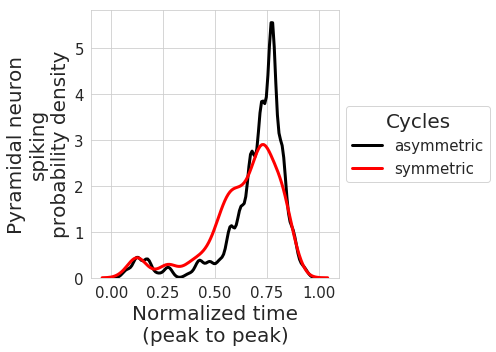

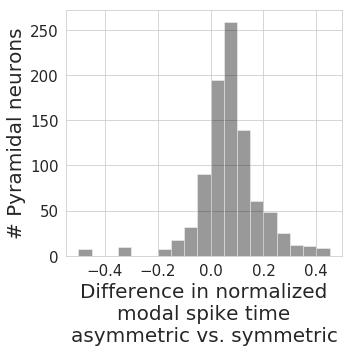

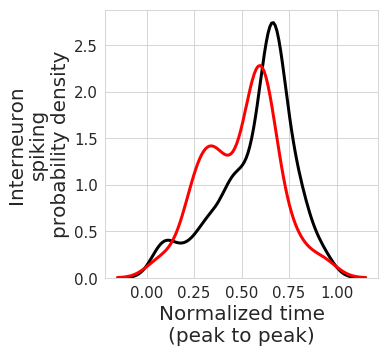

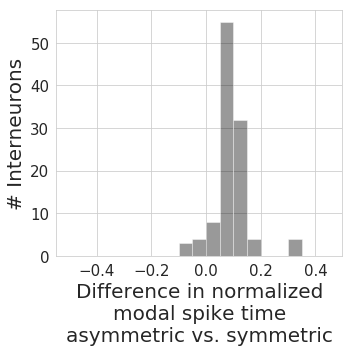

In [6]:
df_plt = df_neus[df_neus['nonuniform_norm_spk_times_p'] < .05]
df_plt['norm_spktime_mode_asym_diff'] = df_plt['norm_spktime_asym_mode'] - df_plt['norm_spktime_sym_mode']

for t, name, letters in zip(['p', 'i'], ['Pyramidal ', 'Inter'], [['A', 'C'], ['B', 'D']]):
    if t == 'p':
        figsize = (7,5)
    else:
        figsize = (5.5,5)
    plt.figure(figsize=figsize)
    sns.distplot(df_plt[df_plt['type']==t]['norm_spktime_asym_mode'], label = 'asymmetric',
                 bins=np.arange(0, 1.05, .05), color='k', hist=False, kde_kws={'linewidth':3})
    sns.distplot(df_plt[df_plt['type']==t]['norm_spktime_sym_mode'], label = 'symmetric',
                 bins=np.arange(0, 1.05, .05), color='r', hist=False, kde_kws={'linewidth':3})
    plt.xlabel('Normalized time\n(peak to peak)')
    plt.ylabel('{:s}neuron\nspiking\nprobability density'.format(name))
    if t == 'p':
        legend = plt.legend(fontsize=15, loc='center left',
                    bbox_to_anchor=(1, 0.5), title='Cycles')
        legend.get_title().set_fontsize('20')
    else:
        leg = plt.gca().legend()
        leg.remove()
    plt.tight_layout()
    plt.savefig('figs/s2/{:s}.png'.format(letters[0]))
    
    plt.figure(figsize=(5,5))
    sns.distplot(df_plt[df_plt['type']==t]['norm_spktime_mode_asym_diff'],
                 bins=np.arange(-.5, .5, .05), color='k', kde=False)
    plt.ylabel('# {:s}neurons'.format(name))
    plt.xlabel('Difference in normalized\nmodal spike time\nasymmetric vs. symmetric')
    plt.tight_layout()
    plt.savefig('figs/s2/{:s}.png'.format(letters[1]))

# E-H. Distribution of trough-relative spike timing changes with rdsym
* spikes earlier for asymmetric cycles (coupled to decay, and center of decay is further back)

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


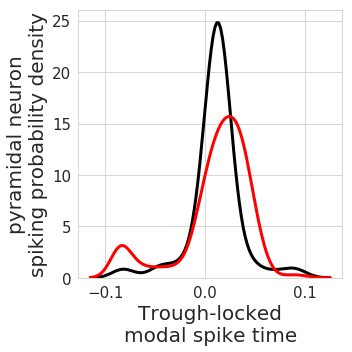

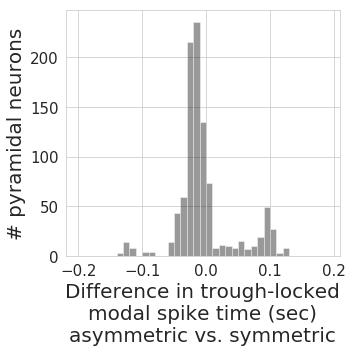

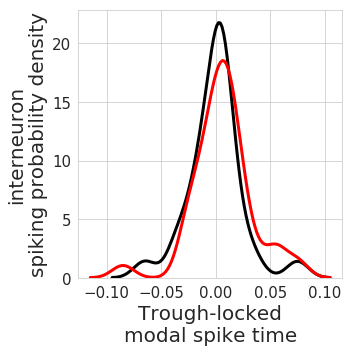

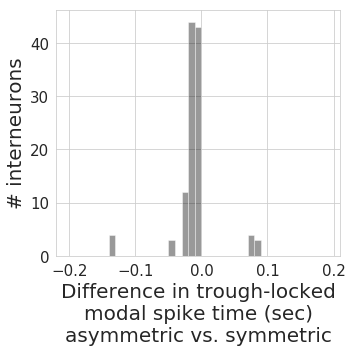

In [7]:
df_plt['trough_spktime_mode_asym_diff'] = df_plt['trough_spike_asym_mode'] - df_plt['trough_spike_sym_mode']

for t, name, letters in zip(['p', 'i'], ['pyramidal ', 'inter'], [['E', 'G'], ['F', 'H']]):
    
    plt.figure(figsize=(5,5))
    sns.distplot(df_plt[df_plt['type']==t]['trough_spike_asym_mode'],
                 bins=np.arange(-.1, .1, .01), color='k', hist=False, kde_kws={'linewidth':3, 'bw':.01})
    sns.distplot(df_plt[df_plt['type']==t]['trough_spike_sym_mode'],
                 bins=np.arange(-.1, .1, .01), color='r', hist=False, kde_kws={'linewidth':3, 'bw':.01})
    plt.xlabel('Trough-locked\nmodal spike time')
    plt.ylabel('{:s}neuron\nspiking probability density'.format(name))
    leg = plt.gca().legend()
    leg.remove()
    plt.tight_layout()
    plt.savefig('figs/s2/{:s}.png'.format(letters[0]))
    
    
    
    plt.figure(figsize=(5,5))
    sns.distplot(df_plt[df_plt['type']==t]['trough_spktime_mode_asym_diff'],
                 bins=np.arange(-.2, .2, .01), color='k', kde=False)
    plt.ylabel('# {:s}neurons'.format(name))
    plt.xlabel('Difference in trough-locked\nmodal spike time (sec)\nasymmetric vs. symmetric')
    plt.xticks(np.arange(-.2,.21,.1))
    plt.tight_layout()
    plt.savefig('figs/s2/{:s}.png'.format(letters[1]))


# I-L. Difference in maximal firing phase from asym to sym
* Asymmetric cycles fire earlier in cycle (earlier in decay)

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


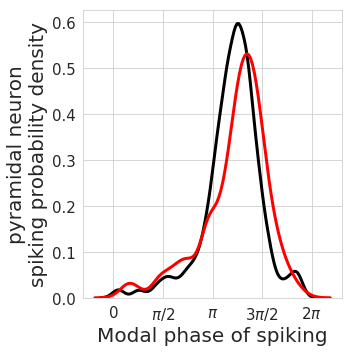

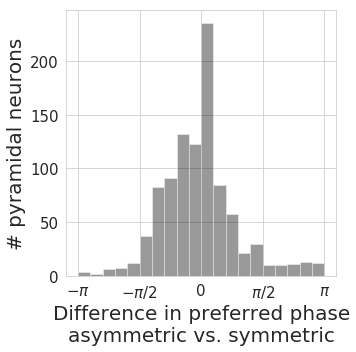

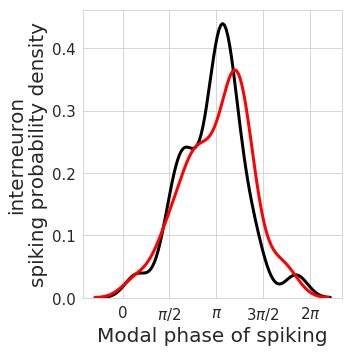

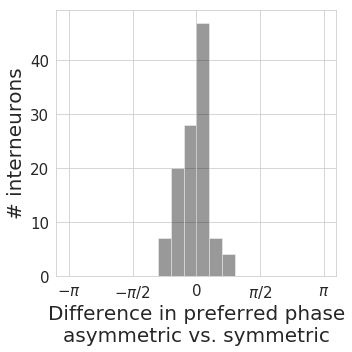

In [8]:
df_plt['pha_spktime_mode_asym_diff'] = np.angle(np.exp(1j*(df_plt['pha_spike_asym_mode'] - df_plt['pha_spike_sym_mode'])))

for t, name, letters in zip(['p', 'i'], ['pyramidal ', 'inter'], [['I', 'K'], ['J', 'L']]):
    
    # Convert phase to 0 to 2pi
    x1 = [p if p > 0 else 2*np.pi+p for p in df_plt[df_plt['type']==t]['pha_spike_asym_mode']]
    x2 = [p if p > 0 else 2*np.pi+p for p in df_plt[df_plt['type']==t]['pha_spike_sym_mode']]
    
    plt.figure(figsize=(5,5))
    sns.distplot(x1, bins=np.arange(0, np.pi*2.1, np.pi/10), color='k', hist=False, kde_kws={'linewidth':3})
    sns.distplot(x2, bins=np.arange(0, np.pi*2.1, np.pi/10), color='r', hist=False, kde_kws={'linewidth':3})
    plt.xlabel('Modal phase of spiking')
    plt.ylabel('{:s}neuron\nspiking probability density'.format(name))
    plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [0, '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
    leg = plt.gca().legend()
    leg.remove()
    plt.tight_layout()
    plt.savefig('figs/s2/{:s}.png'.format(letters[0]))
    
    plt.figure(figsize=(5,5))
    sns.distplot(df_plt[df_plt['type']==t]['pha_spktime_mode_asym_diff'],
                 bins=np.arange(-np.pi, np.pi*1.1, np.pi/10), color='k', kde=False)
    plt.ylabel('# {:s}neurons'.format(name))
    plt.xlabel('Difference in preferred phase\nasymmetric vs. symmetric')
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi,], ['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
    plt.tight_layout()
    plt.savefig('figs/s2/{:s}.png'.format(letters[1]))

    